# classification_Prima data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('pima-indians-diabetes-data.csv')
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.Target.unique() 

array([1, 0], dtype=int64)

# assming 1=diabitic,0=non diabitic


# apply logistic regression

In [5]:
# as we have 2 target values 0 and 1
#splitting data 
X=df.iloc[:,:-1] # all rows and all clumns except the last one 
Y=df.iloc[:,-1]# alll rows and only last column


In [6]:
X[0:5] # just checking

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
Y[0:5]

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [61]:
#train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.25,random_state=80)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [63]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [64]:
lg.fit(X_train,Y_train)

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred = lg.predict(X_test)

In [66]:
#predicting the test cases
pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': lg.predict( X_test ) } )

In [67]:
pred[0:5]

,actual,predicted
562,0,0
337,1,0
139,0,0
701,1,0
467,0,0


In [68]:
pred[10:20]

,actual,predicted
317,1,1
444,1,0
224,0,0
261,1,1
232,0,0
255,1,0
567,0,0
155,1,1
418,0,0
600,0,0


In [69]:
#creating the confusion matrix
from sklearn import metrics
cm= metrics.confusion_matrix(pred.actual,
                            pred.predicted)

In [70]:
cm

array([[109,  14],
       [ 28,  41]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

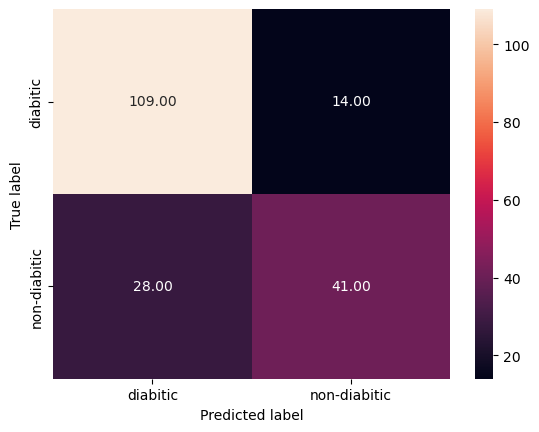

In [71]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["diabitic", "non-diabitic"] , yticklabels = ["diabitic", "non-diabitic"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [72]:
score = metrics.accuracy_score( pred.actual, pred.predicted )
round( float(score), 2 )

0.78